# Week 1: Q-Learning on FrozenLake

Welcome to Week 1! This week we’ll get hands-on with **Q-learning** using OpenAI Gym’s **FrozenLake-v1** environment. Your goal is to train a tabular Q-learning agent to navigate a slippery frozen lake without falling into holes.

Read about the FrozenLake environment from the openAI gymnasium website and try to solve this assignment

## Goals

- Understand and implement Q-learning with a Q-table.
- Use an ε-greedy exploration strategy.
- Visualize training progress with reward curves.
- Evaluate the learned policy.


## Environment Setup

In [7]:
!pip install gym==0.26.2 matplotlib numpy
!pip install numpy==1.23.5
# ! to execute a shell command here

In [8]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random

# initializing an env object of the FrozenLake environment; is_slippery=True
# means can go in unintended dirn too
env = gym.make("FrozenLake-v1", is_slippery=True)
# observation_state defines the states of the env like Discrete or continuous and .n gives number of possible distinct states (16 in this case)
state_space_size = env.observation_space.n
# .action_space tells what actions agent is allowed to take and their structure and .n gives number of possible
action_space_size = env.action_space.n
# scorecard where rows is number of possible positions and columns is possible moves. at first every move has score 0
Q = np.zeros((state_space_size, action_space_size))

## Training Loop
Complete the training loop

In [9]:
def train_agent(episodes=2000, alpha0=0.8, gamma=0.95, epsilon=1.0, decay=0.995, lr_decay=0.001):
    rewards = []
    for ep in range(episodes):
        alpha = alpha0 / (1 + lr_decay * ep)
        state = env.reset()[0]
        done = False
        total_reward = 0
        while not done:
            #TODO select action
            if random.random() < epsilon:
              action = env.action_space.sample()
            else :
              action = np.argmax(Q[state])

            next_state, reward, done, _, _ = env.step(action) #uncomment this after adding algo to choose action

            if reward == 0 and done == True:
              reward = -1

            #TODO Update The Q values
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

            state = next_state
            total_reward += reward

        #TODO maybe try decaying epsilon between episodes
        epsilon *= decay

        rewards.append(total_reward)
    return rewards

## Plotting Results

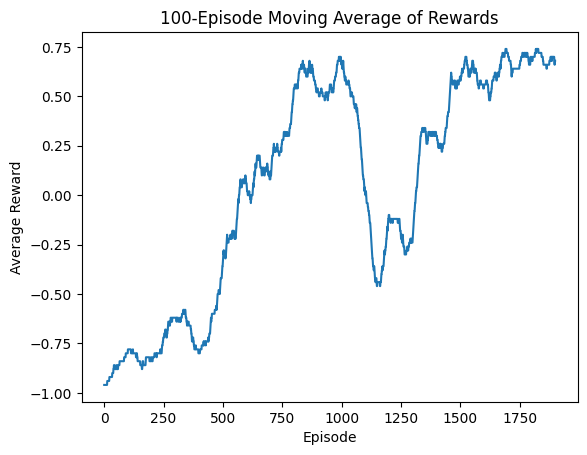

In [10]:
rewards = train_agent()
plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'))
plt.title("100-Episode Moving Average of Rewards")
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.show()

## Test the Learned Policy

In [11]:
def test_agent(Q, episodes=5):
    for ep in range(episodes):
        state = env.reset()[0]
        done = False
        print(f"Episode {ep + 1}")
        while not done:
            action = np.argmax(Q[state])
            next_state, reward, done, _, _ = env.step(action)
            env.render()
            state = next_state

In [12]:
test_agent(Q)

Episode 1
Episode 2
Episode 3
Episode 4
Episode 5


/usr/local/lib/python3.11/dist-packages/gym/envs/toy_text/frozen_lake.py:271: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("FrozenLake-v1", render_mode="rgb_array")
  logger.warn(


## Challenges

1. Set `is_slippery=False` and compare performance.
2. Change the reward for falling into holes.
3. Add a decaying learning rate `α = α0 / (1 + decay * t)`.
4. Visualize the Q-table as a heatmap (optional).
5. Maybe try to think about how to generalize this to solve a random lake without pretraining on the specific environment(Post your ideas on the whatsapp group and we will host a competition if people are interested)


## TLDR

Learn how to implement tabular Q-learning to solve a simple environment. Use exploration, value updates, and reward tracking to build intuition before moving to deep RL.

